In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import ticker
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.interpolate import BSpline, make_interp_spline
import os

DPI=2000

In [204]:


data_chi = [0.0000, 0.1112, 0.2875, 0.3398, 0.4492, 0.5572, 0.6663, 0.7757, 0.8932, 1.0000]
data_n = [1.4201, 1.4127, 1.3993, 1.3967, 1.3879, 1.3810, 1.3737, 1.3679, 1.3605, 1.3565]

df = pd.DataFrame({'chi': data_chi, 'n': data_n})

df

,chi,n
0,0.0000,1.4201
1,0.1112,1.4127
2,0.2875,1.3993
3,0.3398,1.3967
4,0.4492,1.3879
5,0.5572,1.3810
6,0.6663,1.3737
7,0.7757,1.3679
8,0.8932,1.3605
9,1.0000,1.3565


In [205]:
def format_x(x, pos):
    return '{:.4f}'.format(x)

def format_y(x, pos):
    return '{:.4f}'.format(x)

In [219]:
# 使用二次函数拟合
z1 = np.polyfit(df['chi'], df['n'], 2)
p1 = np.poly1d(z1)
print(p1) # 在屏幕上打印拟合多项式

# 计算r2
yvals = p1(df['chi'])
ybar = np.sum(df['n'])/len(df['n']) # or sum(y)/len(y)
ssreg = np.sum((yvals-ybar)**2) # or sum([ (yval-ybar)**2 for yval in y])
sstot = np.sum((df['n']-ybar)**2) # or sum([ (yval-ybar)**2 for yval in y])
r2 = ssreg / sstot
print(r2)

# 分别打印a，b，c
print("a:",z1[0]," b:",z1[1]," c:",z1[2])

# 求 a,b,c各自的偏差
p1(0.3171)

         2
0.01371 x - 0.07888 x + 1.421
0.9990869742857552
a: 0.013713943723192762  b: -0.07887996838879323  c: 1.4208111315527034


1.3971772636685884

In [222]:
z1 = np.polyfit(df['chi'], df['n'], 2)
p1 = np.poly1d(z1)

# 计算残差
residuals = df['n'] - p1(df['chi'])

# 计算残差的标准差
std_error = np.sqrt(np.sum(residuals**2) / (len(df['n']) - len(z1)))

# 计算设计矩阵
X = np.column_stack([df['chi']**2, df['chi'], np.ones(len(df['chi']))])
print(X)
# 计算参数的协方差矩阵
cov_matrix = np.linalg.inv(X.T.dot(X)) * std_error**2

# 计算每个参数的标准误差
param_errors = np.sqrt(np.diag(cov_matrix))

# 打印参数和它们的标准误差
for i, param in enumerate(z1):
    print(f"Parameter {i}: {param}, Standard Error: {param_errors[i]}")

R2 = 1 - residuals.var() / df['n'].var()
print(R2)

[[0.         0.         1.        ]
 [0.01236544 0.1112     1.        ]
 [0.08265625 0.2875     1.        ]
 [0.11546404 0.3398     1.        ]
 [0.20178064 0.4492     1.        ]
 [0.31047184 0.5572     1.        ]
 [0.44395569 0.6663     1.        ]
 [0.60171049 0.7757     1.        ]
 [0.79780624 0.8932     1.        ]
 [1.         1.         1.        ]]
Parameter 0: 0.013713943723192762, Standard Error: 0.002555894739785139
Parameter 1: -0.07887996838879323, Standard Error: 0.0026772677779566376
Parameter 2: 1.4208111315527034, Standard Error: 0.0005948693704506613
0.9990869742857609


In [224]:
import numpy as np

# 已知的拟合模型参数和它们的标准误差
  # 参数标准误差，也假设已知

# 给定的 x 值
x = 0.3171

# 计算预测值 y
y_pred = z1[0] * x**2 + z1[1] * x + z1[2]

# 计算预测值的误差
# 构建雅可比矩阵（这里是一个行向量）
J = np.array([x**2, x, 1])

# 计算预测误差
pred_error = np.sqrt(J.dot(cov_matrix).dot(J.T))

# 打印结果
print(f"Predicted y at x = {x}: {y_pred}")
print(f"Error in predicted y: {pred_error}")


Predicted y at x = 0.3171: 1.3971772636685884
Error in predicted y: 0.0003188736522836925


In [207]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

plt.figure(figsize=(8, 6), dpi=DPI)
# marker为小球：o，方块：s，星星：*，加号：+，叉叉：x，三角形：^，倒三角：v，菱形：D，六边形：h，五边形：p，八边形：8，圈圈：o，
plt.scatter(df['chi'], df['n'], marker='o', color='black')
plt.plot(df['chi'], p1(df['chi']), color='red', label='Fitted Curve')

plt.xlabel(r'$\chi_{\rm{EtOH}}$')
plt.ylabel(r'$n$')
plt.legend(frameon=False)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.2)

plt.show()

In [208]:
CyH1_add = np.array([0, 1, 1, 2, 3, 3, 4, 5])
CyH1 = np.cumsum(CyH1_add)
EtOH1 = np.array([20]*len(CyH1))

bp_g1 = np.array([78.43,76.10,74.62,71.26,68.4,67.66,66.24,65.63])
n_g1 = np.array([1.3565,1.3769,1.3809,1.3854,1.389,1.39,1.395,1.3965])
chi_g1 = cal_chi(n_g1)

bp_l1 = np.array([78.42,75.89,74.99,71.29,68.41,67.11,66.22,65.80])
n_l1 = np.array([1.3565,1.3579,1.3604,1.363,1.3689,1.3771,1.3806,1.3826])
chi_l1 = cal_chi(n_l1)

df1 = pd.DataFrame({'CyH': CyH1, 'EtOH': EtOH1, 'bp_g': bp_g1, 'n_g': n_g1, 'chi_g': chi_g1, 'bp_l': bp_l1, 'n_l': n_l1, 'chi_l': chi_l1})
df1

,CyH,EtOH,bp_g,n_g,chi_g,bp_l,n_l,chi_l
0,0,20,78.43,1.3565,0.983458,78.42,1.3565,0.983458
1,1,20,76.10,1.3769,0.624484,75.89,1.3579,0.956675
2,2,20,74.62,1.3809,0.560615,74.99,1.3604,0.909757
3,4,20,71.26,1.3854,0.490805,71.29,1.3630,0.862121
4,7,20,68.40,1.3890,0.436395,68.41,1.3689,0.757994
5,10,20,67.66,1.3900,0.421495,67.11,1.3771,0.621248
6,14,20,66.24,1.3950,0.348313,66.22,1.3806,0.565344
7,19,20,65.63,1.3965,0.326768,65.80,1.3826,0.533998


In [209]:
EtOH2_add = np.array([0, 0.2, 0.2, 0.5, 0.5, 2, 5, 5])
EtOH2 = np.cumsum(EtOH2_add)
CyH2 = np.array([20]*len(EtOH2))

bp_g2 = np.array([81.00, 78.88, 76.12, 69.97, 68.02, 65.64, 65.58, 65.36])
n_g2 = np.array([1.4197,1.4005,1.3992,1.3979,1.3977,1.397,1.3971,1.3973])
chi_g2 = cal_chi(n_g2)

bp_l2 = np.array([81.10, 78.91, 76.19, 70.25, 68.12, 65.65, 65.38, 65.62])
n_l2 = np.array([1.4199,1.4181,1.4173,1.4160,1.4149,1.4083,1.3963,1.3875])
chi_l2 = cal_chi(n_l2)

df2 = pd.DataFrame({'CyH': CyH2, 'EtOH': EtOH2, 'bp_g': bp_g2, 'n_g': n_g2, 'chi_g': chi_g2, 'bp_l': bp_l2, 'n_l': n_l2, 'chi_l': chi_l2})
df2

,CyH,EtOH,bp_g,n_g,chi_g,bp_l,n_l,chi_l
0,20,0.0,81.00,1.4197,0.014121,81.10,1.4199,0.011574
1,20,0.2,78.88,1.4005,0.270186,78.91,1.4181,0.034578
2,20,0.4,76.12,1.3992,0.288439,76.19,1.4173,0.044862
3,20,0.9,69.97,1.3979,0.306823,70.25,1.4160,0.061654
4,20,1.4,68.02,1.3977,0.309663,68.12,1.4149,0.075941
5,20,3.4,65.64,1.3970,0.319627,65.65,1.4083,0.163243
6,20,8.4,65.58,1.3971,0.318201,65.38,1.3963,0.329630
7,20,13.4,65.36,1.3973,0.315352,65.62,1.3875,0.458917


In [210]:
df12 = pd.concat([df1, df2], ignore_index=True)
df12.to_latex('df12.tex', index=False)

In [211]:
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from statsmodels.api import OLS
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit, Polynomial

In [212]:
# 通过B-spline插值，plt.scatter(df1['chi_g'], df1['bp_g'], marker='o', color='black', label='Group 1')
# plt.scatter(df2['chi_g'], df2['bp_g'], marker='o', color='black') 得到曲线

chi_g1 = df1['chi_g'].copy().sort_values()
bp_g1 = df1['bp_g'].copy().sort_values()
x_newg1 = np.linspace(chi_g1.min(), chi_g1.max(), 300)
# B-spline插值，使用B-spline曲线拟合
spl_g1 = make_interp_spline(chi_g1, bp_g1, k=1)
y_newg1 = spl_g1(x_newg1)

chi_g2 = df2['chi_g'].copy().sort_values()
bp_g2 = df2['bp_g'].copy()
x_newg2 = np.linspace(chi_g2.min(), chi_g2.max(), 300)
# B-spline插值，使用B-spline曲线拟合
spl_g2 = make_interp_spline(chi_g2, bp_g2, k=1)
y_newg2 = spl_g2(x_newg2)

In [213]:
df1['chi_g'], df1['bp_g'] = chi_g1, bp_g1
df2['chi_g'], df2['bp_g'] = chi_g2, bp_g2

outg1 = pd.DataFrame({'chi_g': chi_g1, 'bp_g': bp_g1})
outg2 = pd.DataFrame({'chi_g': chi_g2, 'bp_g': bp_g2})
outg1, outg2

(      chi_g   bp_g
 7  0.326768  65.63
 6  0.348313  66.24
 5  0.421495  67.66
 4  0.436395  68.40
 3  0.490805  71.26
 2  0.560615  74.62
 1  0.624484  76.10
 0  0.983458  78.43,
       chi_g   bp_g
 0  0.014121  81.00
 1  0.270186  78.88
 2  0.288439  76.12
 3  0.306823  69.97
 4  0.309663  68.02
 5  0.319627  65.64
 6  0.318201  65.58
 7  0.315352  65.36)

In [214]:
outl1 = pd.DataFrame({'chi_l': df1['chi_l'], 'bp_l': df1['bp_l']})
outl2 = pd.DataFrame({'chi_l': df2['chi_l'], 'bp_l': df2['bp_l']})
outl = pd.concat([outl1, outl2], axis=0).sort_values(by='chi_l').reset_index(drop=True)
outl

,chi_l,bp_l
0,0.011574,81.10
1,0.034578,78.91
2,0.044862,76.19
3,0.061654,70.25
4,0.075941,68.12
5,0.163243,65.65
6,0.329630,65.38
7,0.458917,65.62
8,0.533998,65.80
9,0.565344,66.22


In [215]:
p_g1 = np.polyfit(chi_g1, bp_g1, 1)
p_g2 = np.polyfit(chi_g2, bp_g2, 1)

x_newg1 = np.linspace(chi_g1.min(), chi_g1.max(), 300)
y_newg1 = np.polyval(p_g1, x_newg1)
x_newg2 = np.linspace(chi_g2.min(), chi_g2.max(), 300)
y_newg2 = np.polyval(p_g2, x_newg2)

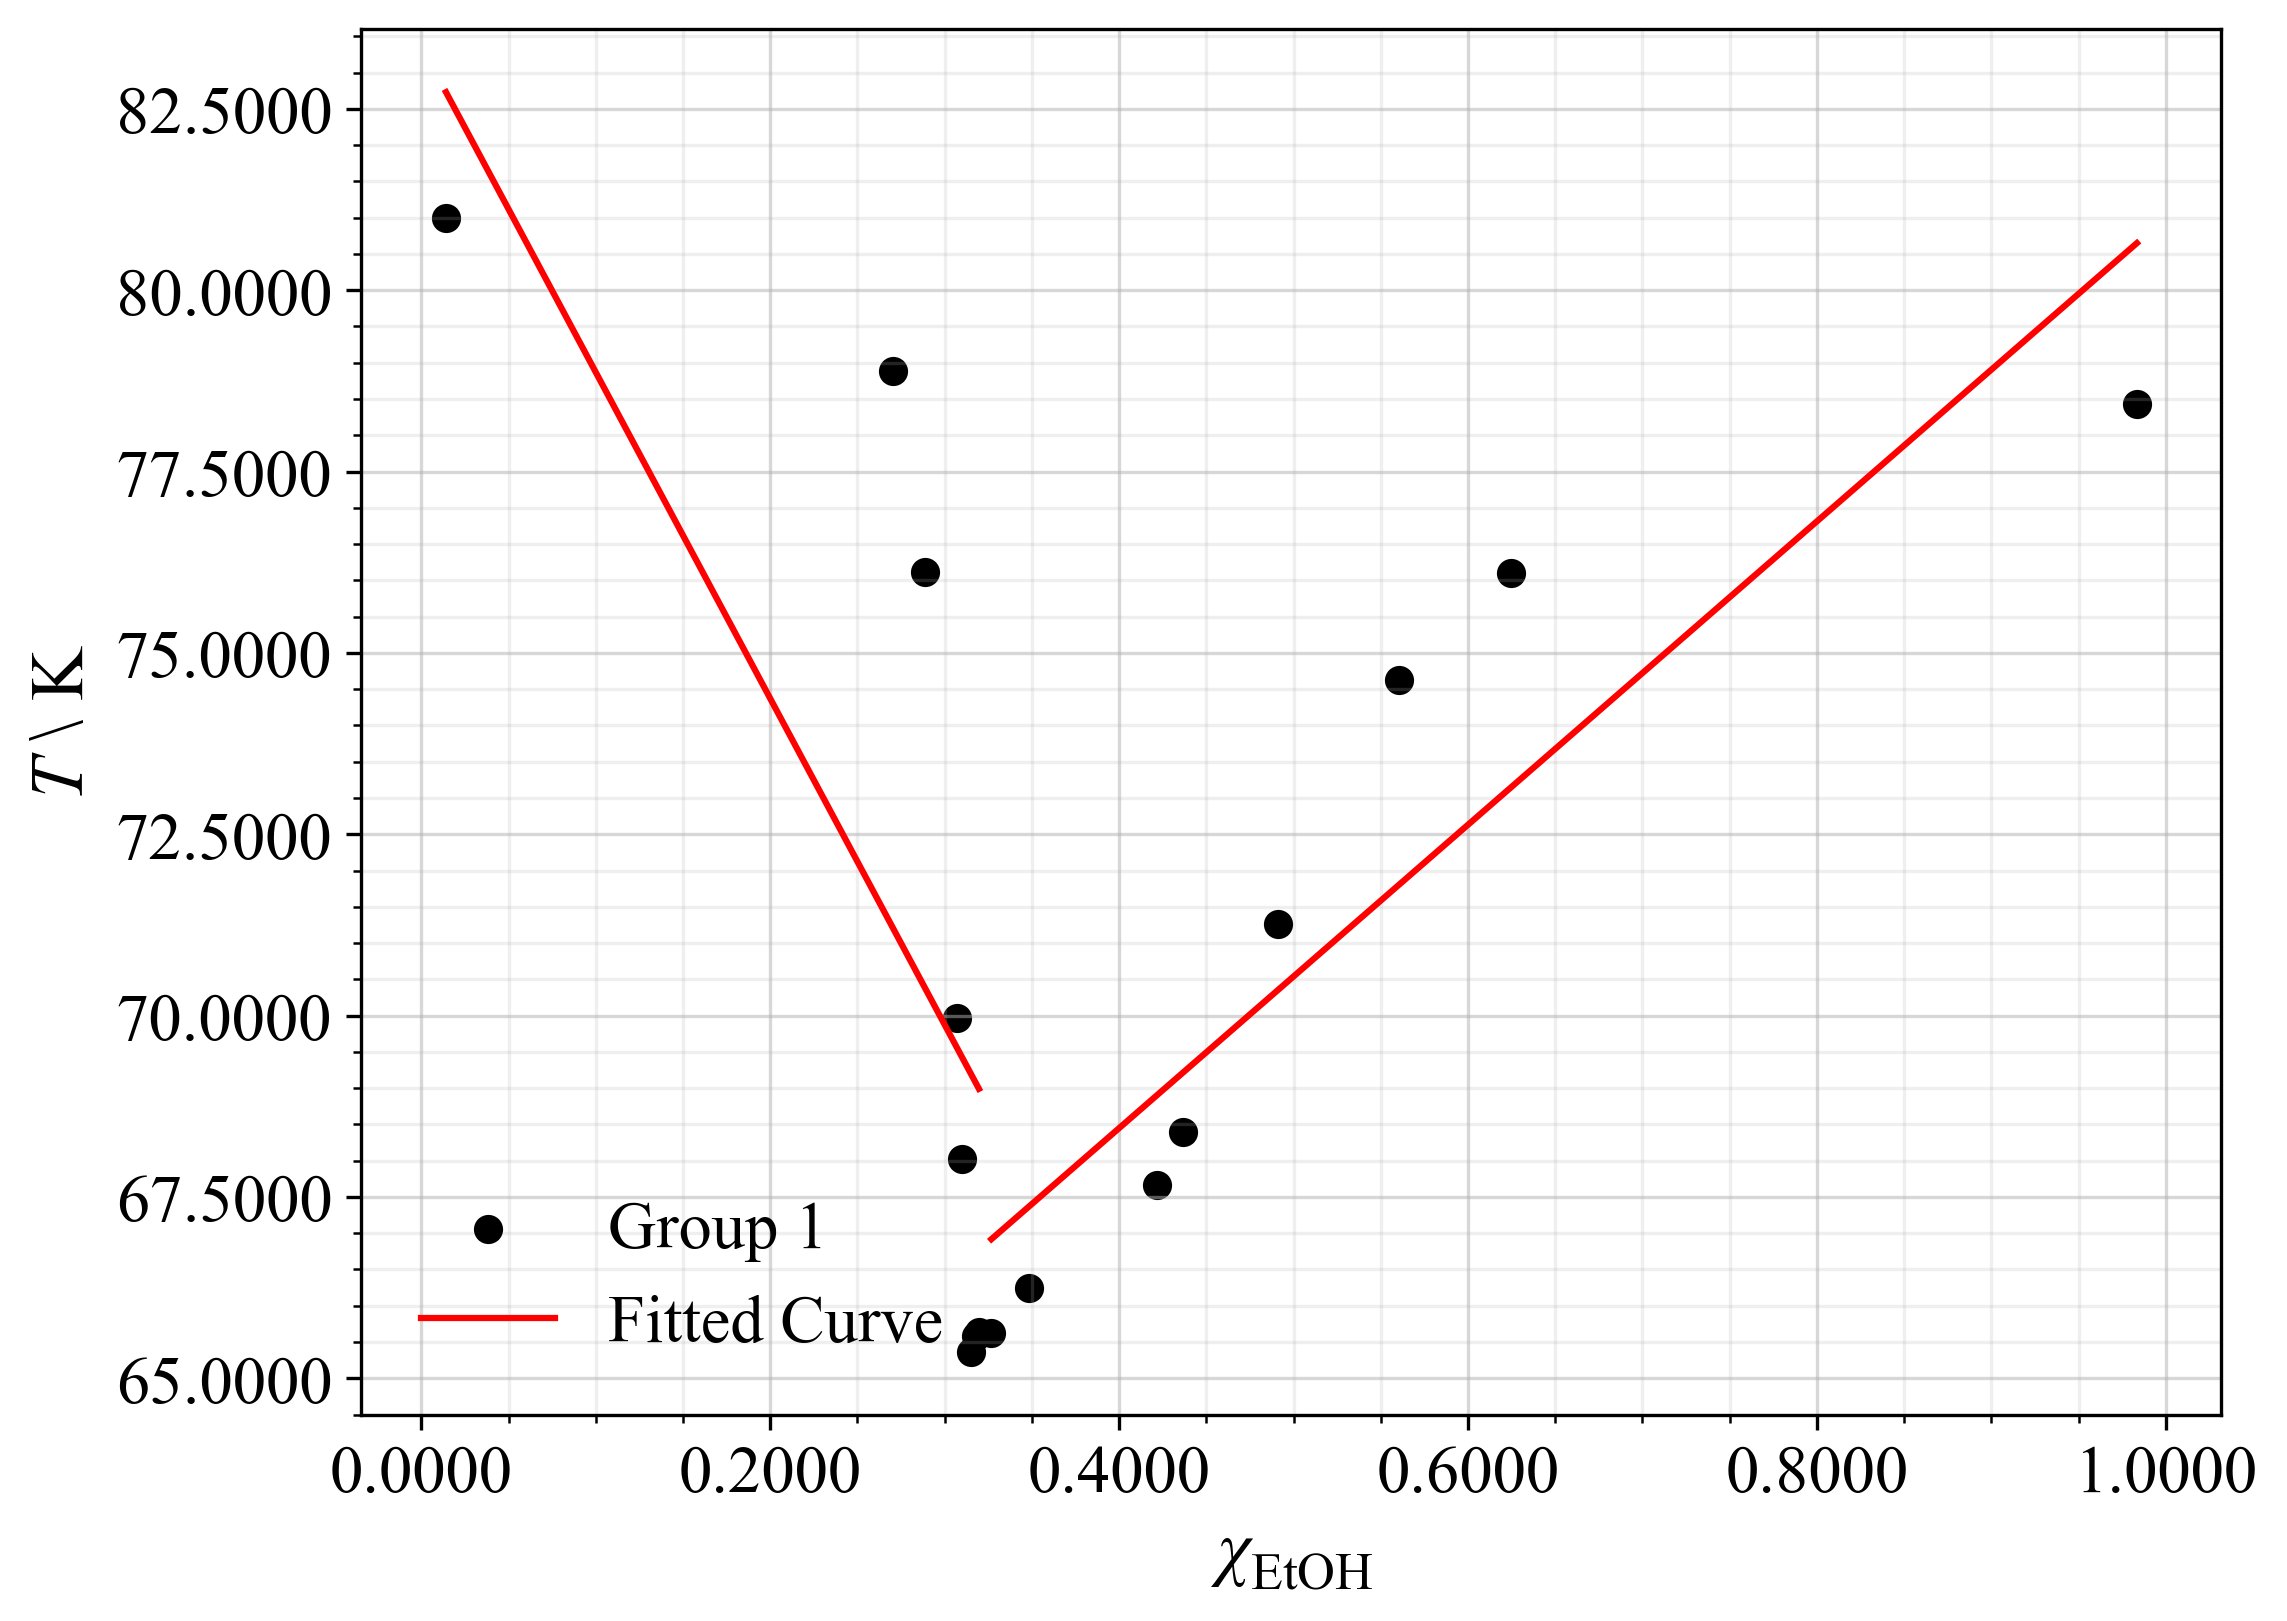

In [216]:
plt.figure(figsize=(8, 6), dpi=300)
# marker为小球：o，方块：s，星星：*，加号：+，叉叉：x，三角形：^，倒三角：v，菱形：D，六边形：h，五边形：p，八边形：8，圈圈：o，
plt.scatter(df1['chi_g'], df1['bp_g'], marker='o', color='black', label='Group 1')
plt.scatter(df2['chi_g'], df2['bp_g'], marker='o', color='black')
plt.plot(x_newg1, y_newg1, color='red', label='Fitted Curve')
plt.plot(x_newg2, y_newg2, color='red')

plt.xlabel(r'$\chi_{\rm{EtOH}}$')
plt.ylabel(r'$T$ \ K')
plt.legend(frameon=False)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.2)

plt.show()

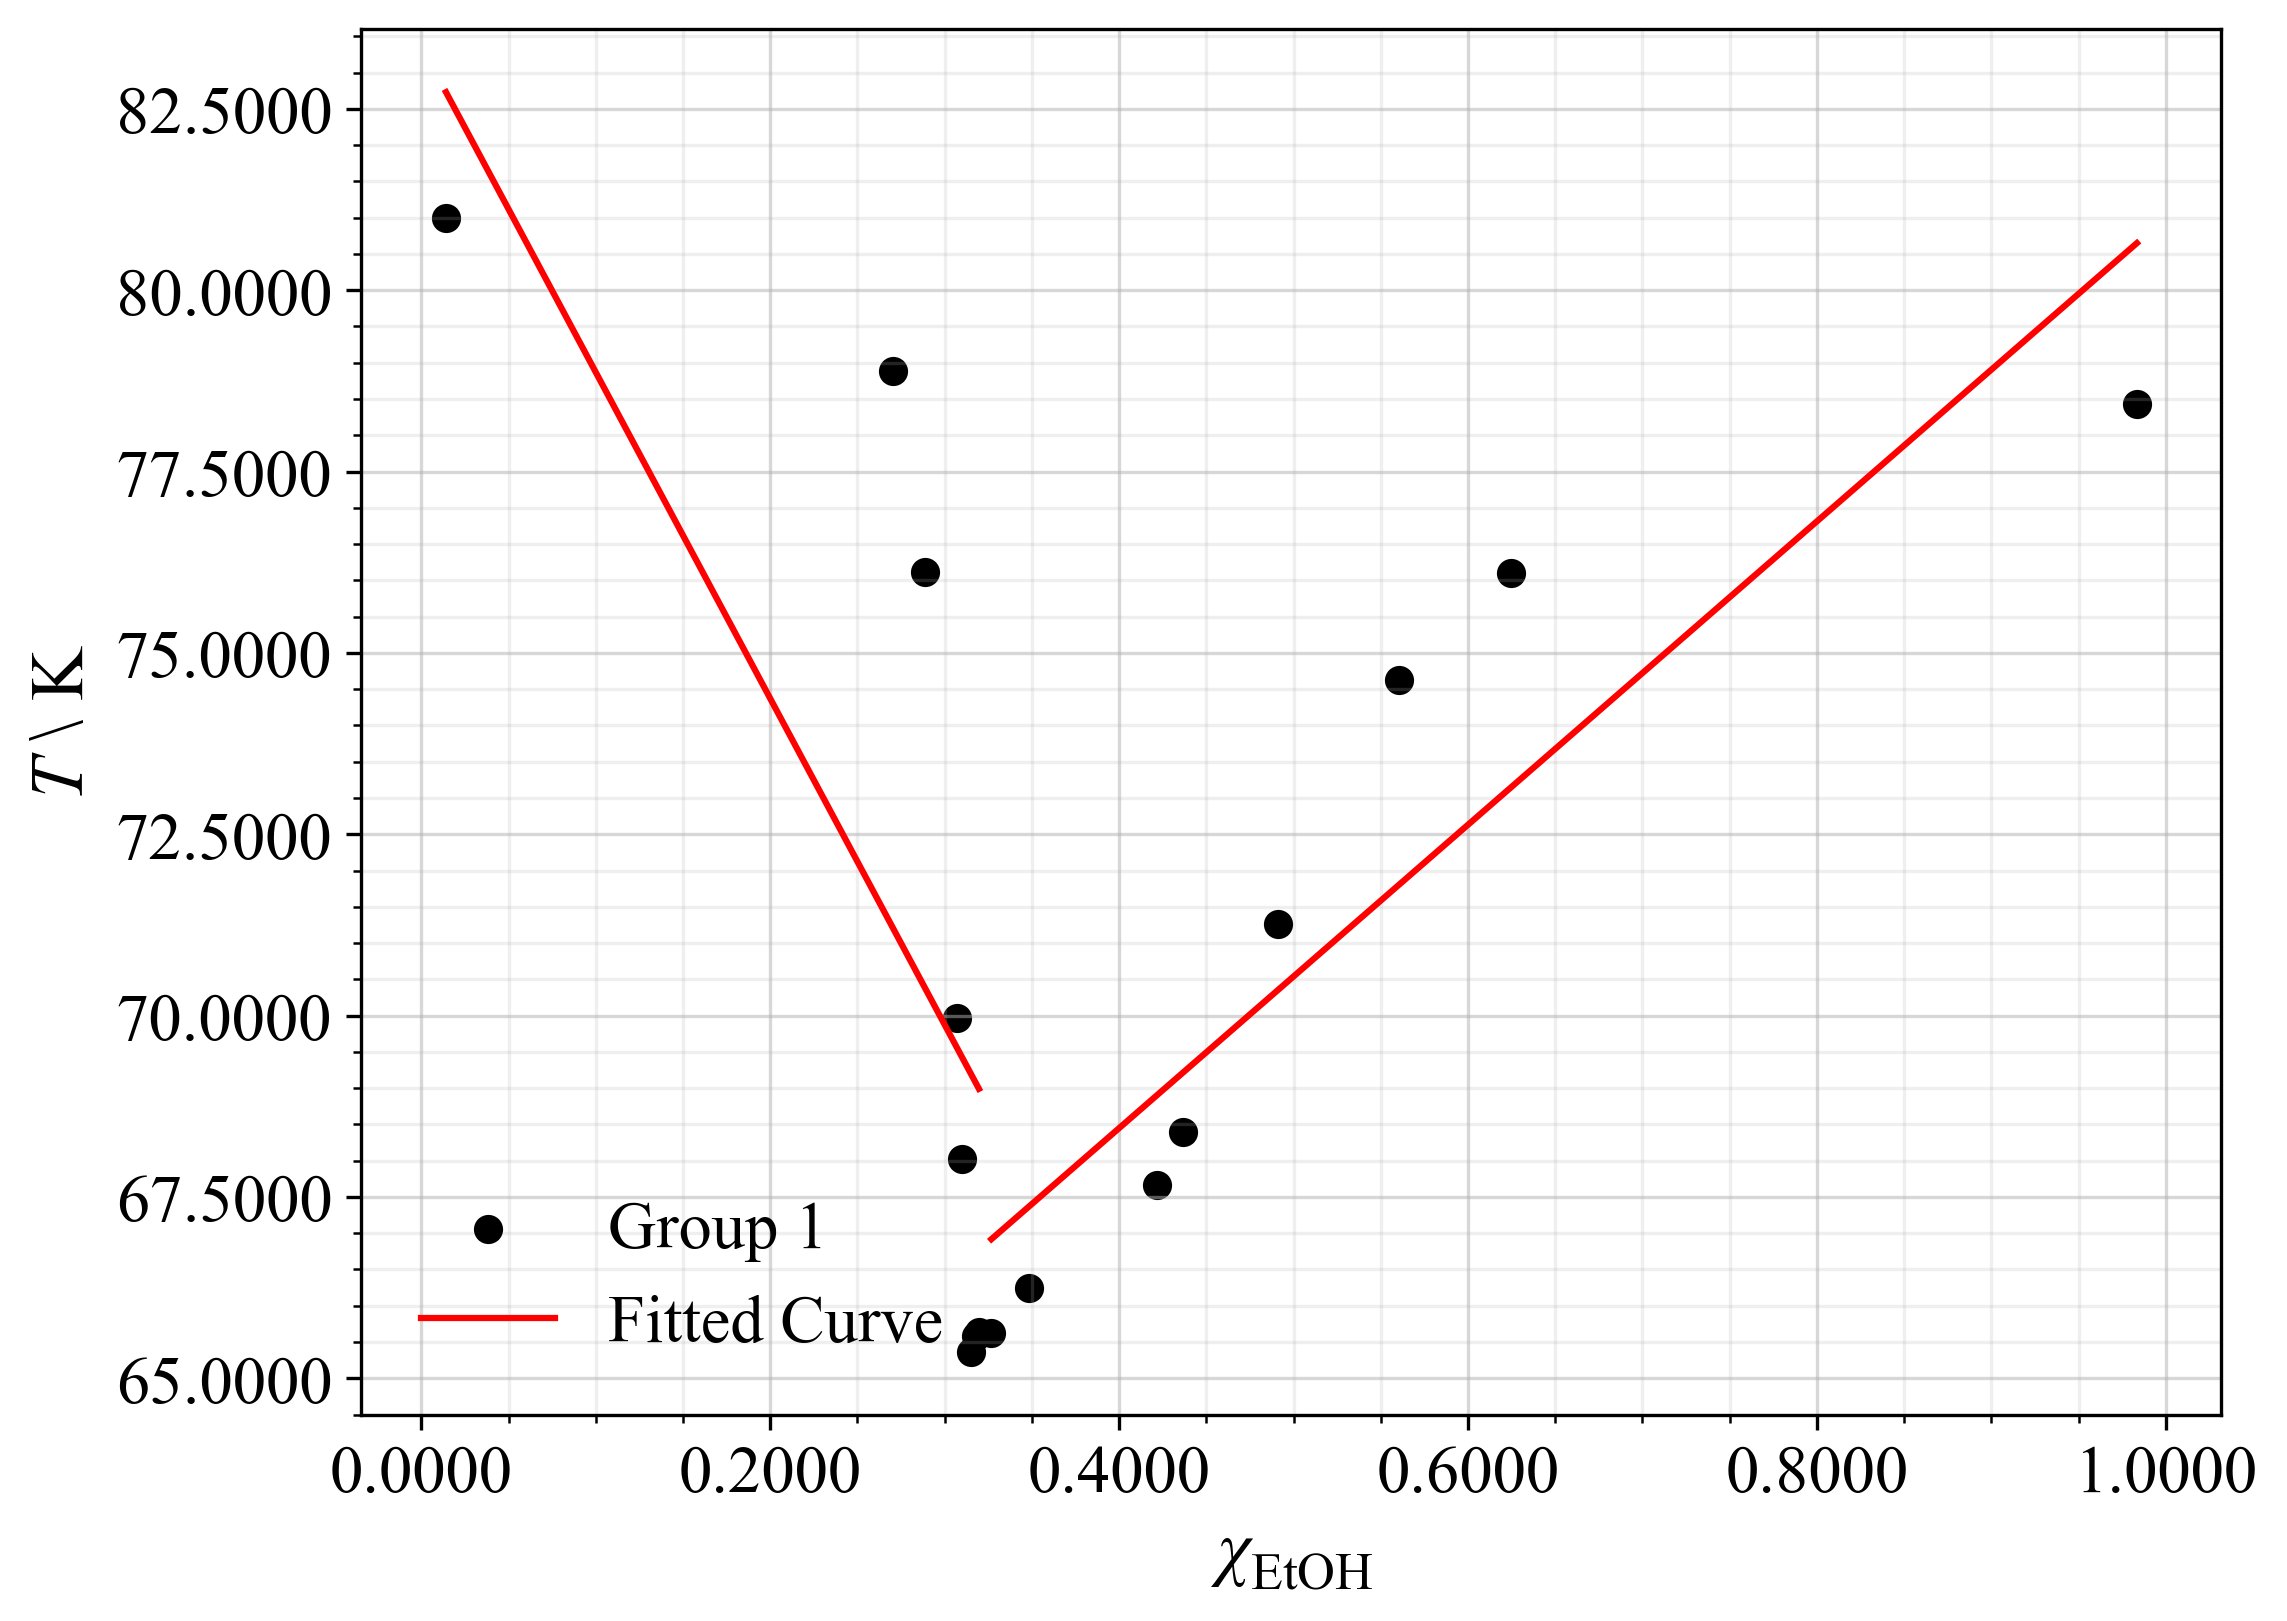

In [217]:
plt.figure(figsize=(8, 6), dpi=300)
# marker为小球：o，方块：s，星星：*，加号：+，叉叉：x，三角形：^，倒三角：v，菱形：D，六边形：h，五边形：p，八边形：8，圈圈：o，
plt.scatter(df1['chi_g'], df1['bp_g'], marker='o', color='black', label='Group 1')
plt.scatter(df2['chi_g'], df2['bp_g'], marker='o', color='black')
plt.plot(x_newg1, y_newg1, color='red')
plt.plot(x_newg2, y_newg2, color='red', label='Fitted Curve')


plt.xlabel(r'$\chi_{\rm{EtOH}}$')
plt.ylabel(r'$T$ \ K')
plt.legend(frameon=False)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.2)

plt.show()

1.4199
1.4181

1.4131

1.4179

1.4149

1.4083

1.3963

1.3875



转化为numpy数组

```
np.array([1.4199,1.4181,1.4131,1.4179,1.4149,1.4083,1.3963,1.3875])
```

```
```

```
```

```
```


 0.3171340629275 65.516298811545

 0.31706566347469 65.46649688738